---
<center><u><h1>Handling time series with pandas</h1></u></center>
---

---

# What is time series?

A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. A time series can be taken on any variable that changes over time.

The usage of time series models is twofold:

* Obtain an understanding of the underlying forces and structure that produced the observed data
* Fit a model and proceed to forecasting, monitoring or even feedback and feedforward control.

Time series are used in statistics, signal processing, pattern recognition, econometrics, mathematical finance, weather forecasting, intelligent transport and trajectory forecasting, earthquake prediction, electroencephalography, control engineering, astronomy, communications engineering, and largely in any domain of applied science and engineering which involves temporal measurements.

Time series are very frequently plotted via line charts. 

Few examples of time series in real world.

* [Monthly temperature in England (F) in 1723-1970](https://datamarket.com/data/set/22vp/monthly-temperature-in-england-f-1723-1970#!ds=22vp&display=line)
* [Monthly precipitation (mm) in Philadelphia in 1820-1950](https://datamarket.com/data/set/22v5/monthly-precipitation-mm-philadelphia-1820-1950#!ds=22v5&display=line)
* [Annual wages in USA in 1900-1970](https://datamarket.com/data/set/22s1/annual-wages-us-1900-to-1970#!ds=22s1&display=line)
* [Annual Copper prices in the world in 1800-1997](https://datamarket.com/data/set/22y1/annual-copper-prices-1800-1997#!ds=22y1&display=line)
* [Annual water use in New York city (litres per capita per day) in 1898-1968](https://datamarket.com/data/set/22tl/annual-water-use-in-new-york-city-litres-per-capita-per-day-1898-1968#!ds=22tl&display=line)

and many others. More examples you may find on [https://datamarket.com](https://datamarket.com/data/list/?q=provider:tsdl).

# Working with time series in pandas

Pandas has proven very successful as a tool for working with time series data, especially in the financial data analysis space. Using the [NumPy](http://www.numpy.org/) `datetime64` and `timedelta64` dtypes, pandas consolidated a large number of features from other Python libraries as well as created a tremendous amount of new functionality for manipulating time series data.

In working with time series data, you will frequently seek to:

* generate sequences of fixed-frequency dates and time spans
* conform or convert time series to a particular frequency
* compute "relative" dates based on various non-standard time increments (e.g. 5 business days before the last business day of the year) or "roll" dates forward or backward

The following examples demonstrate how to work with time, date and datetime data using pandas.

First of all, let's generate a list of datetime values for 3 neighboring days starting from `01/30/2017` with the interval equals to one hour. The [`date_range`](http://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.date_range.html) function can return such list in [`DatetimeIndex`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html) format. We simply should define the left bound for generating dates `start` (`"01/30/2017"` in our case), the right bound for generating dates `end` or the amount of intervals `periods` (`3*24` in our case, because we are going to cover three days) and preferable frequency `freq` (`'H'` in our case)

In [1]:
# Import pandas library at first
import pandas as pd

example_range = pd.date_range(start='01/30/2017', periods=3*24, freq='H')
print("Amount of elements:", len(example_range.values))
example_range[:10]

Amount of elements: 72


DatetimeIndex(['2017-01-30 00:00:00', '2017-01-30 01:00:00',
               '2017-01-30 02:00:00', '2017-01-30 03:00:00',
               '2017-01-30 04:00:00', '2017-01-30 05:00:00',
               '2017-01-30 06:00:00', '2017-01-30 07:00:00',
               '2017-01-30 08:00:00', '2017-01-30 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In the same way we can define any other period in the `freq` attribute, for example, days. The full list of possible values can be found [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

Also, we can create time series, that can be manipulated naturally and easily. First step that we have to do is to create the range of dates for our time series (as mentioned above). Record starts at `2017-01-25` and ends at `2017-02-05`. Frequency of the data is one month `(freq='D')`.

In [2]:
dates = pd.date_range('2017-01-25', '2017-02-05', freq='D')
dates

DatetimeIndex(['2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05'],
              dtype='datetime64[ns]', freq='D')

To convert a `Series` or list-like object of date-like objects e.g. strings, epochs, or a mixture, you can use the [`to_datetime`](http://pandas.pydata.org/pandas-docs/version/0.19.2/generated/pandas.to_datetime.html) function. When passed a `Series`, this returns a Series (with the same index), while a list-like is converted to a `DatetimeIndex`:

In [3]:
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-12-10', None]))

0   2009-07-31
1   2010-12-10
2          NaT
dtype: datetime64[ns]

Above `NaT` represents missing values of datetime type.

It converts date according to `yyyy-mm-dd` format independently of the input

In [4]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

If you use dates which start with the day first (i.e. European style), you can pass the `dayfirst` flag:

In [5]:
pd.to_datetime(['04-01-2012 10:00', '14-01-2012', '01-14-2012'], dayfirst=True)

DatetimeIndex(['2012-01-04 10:00:00', '2012-01-14 00:00:00',
               '2012-01-14 00:00:00'],
              dtype='datetime64[ns]', freq=None)

You can see in the above example that dayfirst isn’t strict, so if a date can’t be parsed with the day being first it will be parsed as if dayfirst were False.

If you pass a single string to `to_datetime`, it returns single [`Timestamp`](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-stamps-vs-time-spans). Also, `Timestamp` can accept the string input. Note that `Timestamp` doesn’t accept string parsing option like `dayfirst` or `format`, use `to_datetime` if these are required.

In [6]:
pd.to_datetime('2013/09/23')

Timestamp('2013-09-23 00:00:00')

# "Daily minimum temperatures in Melbourne" dataset

We're going to be looking some Daily minimum temperatures in Melbourne data from DataMarket. Here's the original [page](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line). You can download this dataset using "Export" section of the same recourse and choosing the CSV format. This dataset is a list of days and daily minimum temperatures 

[`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function allows reading CSV files. By default, it assumes that the fields are comma-separated. We will use it for reading the dataset file (we called it as "daily-minimum-temperatures-in-melbourne.csv")

In [7]:
melbourne_temp = pd.read_csv("daily-minimum-temperatures-in-melbourne.csv", 
                             skiprows=1,  # Allows to skip the header
                             names=["date", "temp"])  # Let's name columns in such way
melbourne_temp

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


Let's look at columns' types using [`dtypes`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dtypes.html) method

Let's visualize the data we have. In the previous example we read data and got an `Object` type. To plot the data we have to convert the column `"temp"` to numeric using [`convert_objects(convert_numeric=True)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.convert_objects.html) function. By doing this we change type to `float64` and we can use pyplot to visualize our dataset. We also should to apply the `to_datetime` function to the `"date"` column. It will allow using its values in filters (see below). 

In [8]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# Let's change the size of figure drown by matplotlob. figsize represents width & height tuple in inches
rcParams['figure.figsize'] = (16, 6)

# Convert "date" column
melbourne_temp['date'] = pd.to_datetime(melbourne_temp['date'])
# Let's convert data to numeric so we can plot it
melbourne_temp['temp'] = pd.to_numeric(melbourne_temp['temp'])

melbourne_temp.set_index('date', inplace=True)

# Let's look at type of "temp" column
print("Type of 'temp' column:", melbourne_temp["temp"].dtypes)
melbourne_temp.head()

Type of 'temp' column: float64


,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Now we can see how the considering time series for temperature in Melbourne looks

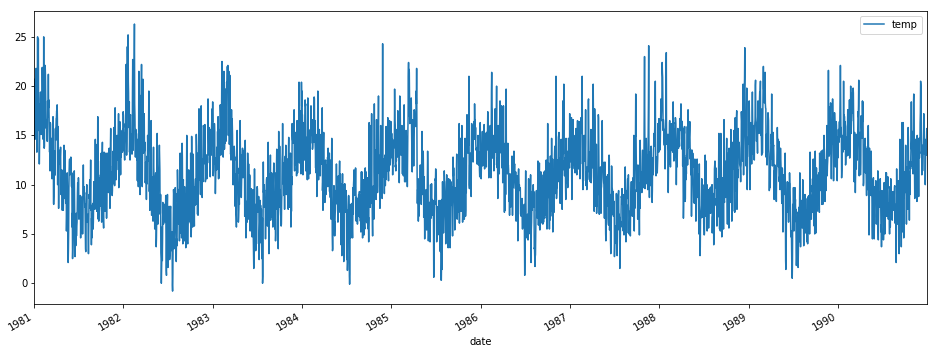

In [9]:
melbourne_temp.plot()
plt.show()

Pay attention that date labels were displayed automatically. 

### Manipulation with data

Manipulation with data can help get an idea of the distribution and spread of values.

This may help with ideas of data scaling and even data cleaning that you can perform later as part of preparing your dataset for modeling.

First of all let's find the minimum temperature for all the time by specifing data and calling `min()` function

In [10]:
melbourne_temp.min()

temp   -0.8
dtype: float64

It is possible to select a specific time range defining the respecive year or month like this

In [11]:
melbourne_temp['1981-01']

,temp
date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1981-01-06,15.8
1981-01-07,15.8
1981-01-08,17.4
1981-01-09,21.8


or even date between some dates

In [12]:
melbourne_temp['1990-01-05':'1990-01-12']

,temp
date,
1990-01-05,14.3
1990-01-06,15.3
1990-01-07,16.4
1990-01-08,14.8
1990-01-09,17.4
1990-01-10,18.8
1990-01-11,22.1
1990-01-12,19.0


Thus we can build a plot for some sample

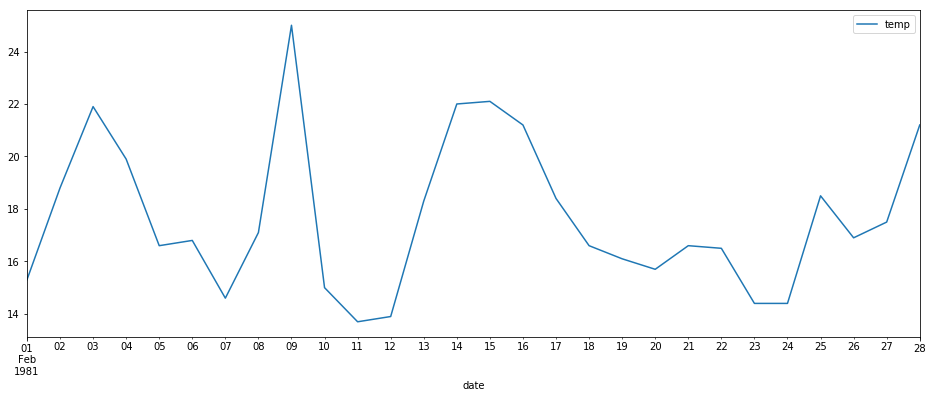

In [13]:
melbourne_temp['1981-02'].plot()
plt.show()

and apply any functions including statistical, for example, let's calculate the average temperature for the above plot 

In [14]:
melbourne_temp['1981-02'].mean()

temp    17.678571
dtype: float64

And finally, we count the number of dates where temperature was less then 2 degrees

In [15]:
print("Days with temperature less than 2 degrees:", (melbourne_temp < 2).sum().values[0])

Days with temperature less than 2 degrees: 28


### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

* **Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.
* **Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

There are perhaps two main reasons why you may be interested in resampling your time series data:

* **Problem Framing**: Resampling may be required if your data is available at the same frequency that you want to make predictions.
* **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

Let’s make resampling more concrete by looking at a real dataset and some examples.

We will use previous dataset "Daily minimum temperatures in Melbourne, Australia, 1981-1990"

Imagine that we want average weekly temparature information. In this case we have to unsample the information from daily to weekly.

We can use this function to transform our daily dataset into a weekly dataset by calling resampling and specifying the preferred frequency of calendar week frequency or "W".

In [16]:
melbourne_temp.resample('W').mean().head(10)

,temp
date,
1981-01-04,18.000000
1981-01-11,17.542857
1981-01-18,20.371429
1981-01-25,15.771429
1981-02-01,16.657143
1981-02-08,17.957143
1981-02-15,18.571429
1981-02-22,17.300000
1981-03-01,17.242857


Check yourself that in the `"temp"` is realy average temperature for respective week.

Instead of creating new rows between existing observations, the [`resample()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.resample.html) function in pandas will group all observations by the new frequency.

This operation is called *downsampling*.

We can downsample the data using the alias `"A"` for year-end frequency and this time use `min` to calculate the miminum (or `max` for maximum, everything you need) temperature of each year.

In [17]:
melbourne_temp.resample('A').min()

,temp
date,
1981-12-31,2.1
1982-12-31,-0.8
1983-12-31,0.0
1984-12-31,-0.1
1985-12-31,0.3
1986-12-31,0.8
1987-12-31,1.5
1988-12-31,2.8
1989-12-31,0.5


Resampling is also a fast way to smooth in some essence the time series. For instance, the time series of monthly averages has much less peaks or outliers and allows tracking the periodicity. 

Much accurate way to smooth a time series is the cacluation of rolling average that is the average value of the current point and `N` previous points. It can be calcualted using [`rolling`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) pandas's method where we should define the window, i.e. amount of points for average calculation.

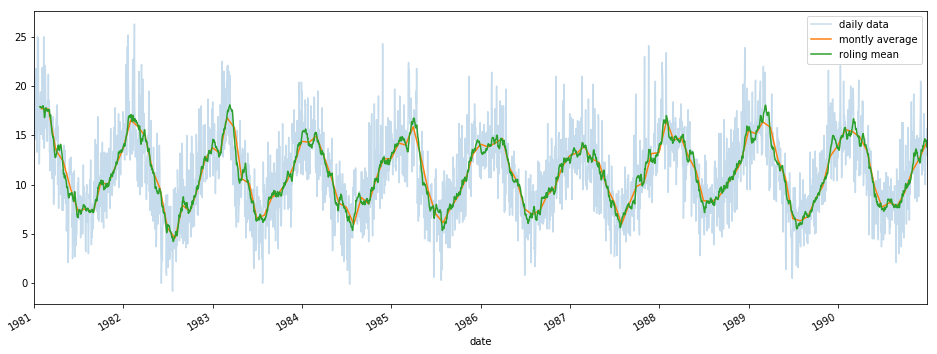

In [18]:
# Draw initial time series and make it transparent
ax = melbourne_temp.plot(alpha=0.25)
# Draw montly average values
melbourne_temp.resample('M').mean().plot(ax=ax)
# Draw roling average that takes into account 25 points
melbourne_temp.rolling(25).mean().plot(ax=ax)
# Specify legend labels
ax.legend(["daily data", "montly average", "roling mean"])
plt.show()

If you set the hourly frequency in the [`resample()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.resample.html) function, then `NaN` values will be created, because there are no more tiny distribution of the temperature.

This procedure is called *upsampling*

In [19]:
upsampled = melbourne_temp.resample('H').mean()
upsampled.head(30)

,temp
date,
1981-01-01 00:00:00,20.7
1981-01-01 01:00:00,NaN
1981-01-01 02:00:00,NaN
1981-01-01 03:00:00,NaN
1981-01-01 04:00:00,NaN
1981-01-01 05:00:00,NaN
1981-01-01 06:00:00,NaN
1981-01-01 07:00:00,NaN
1981-01-01 08:00:00,NaN


But we can interpolate the missing values at this new frequency.

The `Series` pandas's object provides the [`interpolate`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html) function to interpolate missing values. A good starting point is to use a `linear interpolation`. This draws a straight line between available data and fills in values at the chosen frequency from this line.

In [20]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(30)

,temp
date,
1981-01-01 00:00:00,20.700000
1981-01-01 01:00:00,20.583333
1981-01-01 02:00:00,20.466667
1981-01-01 03:00:00,20.350000
1981-01-01 04:00:00,20.233333
1981-01-01 05:00:00,20.116667
1981-01-01 06:00:00,20.000000
1981-01-01 07:00:00,19.883333
1981-01-01 08:00:00,19.766667


# Forecasting daily minimum temperature using ARIMA model

Having time series with such pronounced periodicity may be used for prediction of the undefined values which may happend in the future. In this case the **ARIMA** model help forecast the necessary values.

ARIMA stands for ***A**uto**r**egressive **I**ntegrated **M**oving **A**verage* models. It is a forecasting technique that projects the future values of a series based entirely on its own inertia. It's main application is in the area of short term forecasting requiring at least 40 historical data points. It works best when your data exhibits a stable or consistent pattern over time with a minimum amount of outliers. ARIMA is usually superior to exponential smoothing techniques when the data is reasonably long and the correlation between past observations is stable. If the data is short or highly volatile, then some smoothing method may perform better. If you do not have at least 38 data points, you should consider some other method than ARIMA. But we have 3650 point and can easily use it.

The first step in applying ARIMA methodology is to check for stationarity. "Stationarity" implies that the series remains at a fairly constant level over time. The data should also show a constant variance in its fluctuations over time. This is easily seen with a series that is heavily seasonal and growing at a faster rate. In such a case, the ups and downs in the seasonality will become more dramatic over time. Without these stationarity conditions being met, many of the calculations associated with the process cannot be computed.

We are not going to explaine the mathematical background of this model here, but will simply demonstrate results that can be achieved using it.

An [ARIMA](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.arima_model.ARIMA.html) model can be created using the [statsmodels library](http://statsmodels.sourceforge.net/devel/index.html) as follows:

* Define the model by calling `ARIMA()`
* The model is prepared on the training data by calling the `fit()` function
* Predictions can be made by calling the `predict()` function and specifying the index of the time or times to be predicted.

We will fit an ARIMA model setting the lag value to 5 for [autoregression](https://en.wikipedia.org/wiki/Autoregressive_model), the difference order to 0 to make the time series stationary and the [moving average model](https://en.wikipedia.org/wiki/Moving-average_model) to 0.

In [21]:
from statsmodels.tsa.arima_model import ARIMA

# Replace all NaN values to zero if such exist
melbourne_temp.fillna(0, inplace=True)
# Build an ARIMA model and fit it
model = ARIMA(melbourne_temp, order=(5,0,0))
model_fit = model.fit()

More detailed report about the built ARIMA model and can be obtained from `model_fit.summary()` command. We won't stop on the explanation of its output. 

Next, let’s look at how we can use the ARIMA model to make forecasts. We will train the model on 70% of the first values, i.e. up to `1987-12-31` and starting from `1988-01-01` we will use the fit model to predict the temperature for each day. It is important for understanding how accurate are the forecasts.

Thus, we need to divide the whole dataset into two part: for training (`X_train`) and for testing or forecasting (`X_test`)

In [22]:
n = int(melbourne_temp.size * 0.7)
# All values that are on left side from `n`th element are train sample 
X_train = list(melbourne_temp[:n].values.reshape(-1,))
# All values that are on right side from `n`th element are test sample 
X_test = melbourne_temp[n:]
# Remember list of dates; we will use it further in plots
dates = X_test.index.values
X_test = list(X_test.values.reshape(-1,))
print("X_train has {} elements, X_test has {} elements".format(len(X_train), len(X_test)))

X_train has 2555 elements, X_test has 1095 elements


The logic of prediction is such that we will consider all previous points to predict the value in the next point, for example, we want to forecast the temperature on 02 Jan 1988, than we should take all points before this date. To predict temperature for 03 Jan 1988 we will take into  account all previous days including 02 Jan 1988. On each step we will retrain the ARIMA model to get better matches with correct values.

The [`forecast`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html) method return a tuple conaining array of forecasting values (we will have only single value), array of the standard error of the forecasts and 2d array of the confidence interval for the forecast.

In [23]:
%%time
# We evaluate elapsed time

# Here we will collect all predicted values
predictions = []
for i, val in enumerate(X_test):
    model_fit = ARIMA(X_train, order=(5,0,0)).fit()
    y_pred = model_fit.forecast()[0][0]
    predictions.append(y_pred)
    # Expand the train dataset as explained before
    X_train.append(val)
    # Let's print first 10 predicted and correct value to see the work of the algorithm
    if i < 10: 
        print("Point #{0}: predicted = {1:.3f}, expected = {2:.3f}".format(i, y_pred, val))

Point #0: predicted = 15.729, expected = 15.300
Point #1: predicted = 14.274, expected = 14.300
Point #2: predicted = 13.961, expected = 13.500
Point #3: predicted = 13.498, expected = 15.000
Point #4: predicted = 14.748, expected = 13.600
Point #5: predicted = 13.427, expected = 15.200
Point #6: predicted = 14.516, expected = 17.000
Point #7: predicted = 15.473, expected = 18.700
Point #8: predicted = 16.696, expected = 16.500
Point #9: predicted = 15.262, expected = 17.400
CPU times: user 6min 35s, sys: 3min 5s, total: 9min 40s
Wall time: 6min 13s


We can also calculate a final [root mean squared error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE) for the predictions, providing a point of comparison for other ARIMA configurations. We can use the squared root from the output of [`mean_squared_error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function from [scikit-learn](http://scikit-learn.org/stable/index.html) library for caclulation of RMSE

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

error = sqrt(mean_squared_error(X_test, predictions))
print("RMSE: {0:.3f}".format(error))

RMSE: 2.340


The obtained value of RMSE means that the predicted temperature `x` lies in ranges `[x - RMSE, x + RMSE]`. It is obvious that the lower is RMSE, the better matches we will have.

You may try changing model parameters to decrease RMSE. 

Another way to forecast time series is using of [`predict`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.arima_model.ARMAResults.predict.html) method. We should define `start` and/or `end` ranges for forecasting.

In [25]:
model = ARIMA(melbourne_temp, order=(5,0,0))
model_fit = model.fit()

predictions2 = model_fit.predict(start='1988-01-01', end='1990-12-31').values

A line plot is created showing the expected values (blue) compared to the predictions (red and green) obtained using both above approaches. We can see the values show some trend and are in the correct scale.

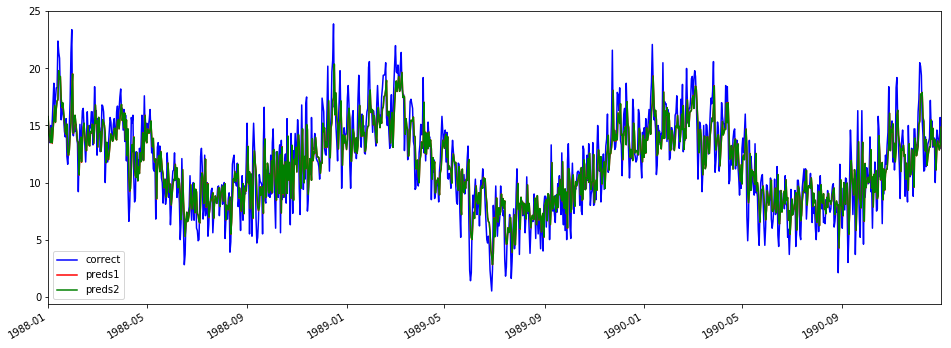

In [32]:
concat = pd.DataFrame(data={'correct': X_test, 'preds1': predictions, 'preds2': predictions2}, index=dates)
concat.plot(color=['b', 'r', 'g'])
plt.show()

Let's take a sample to be sure that green and red lines are overlapping

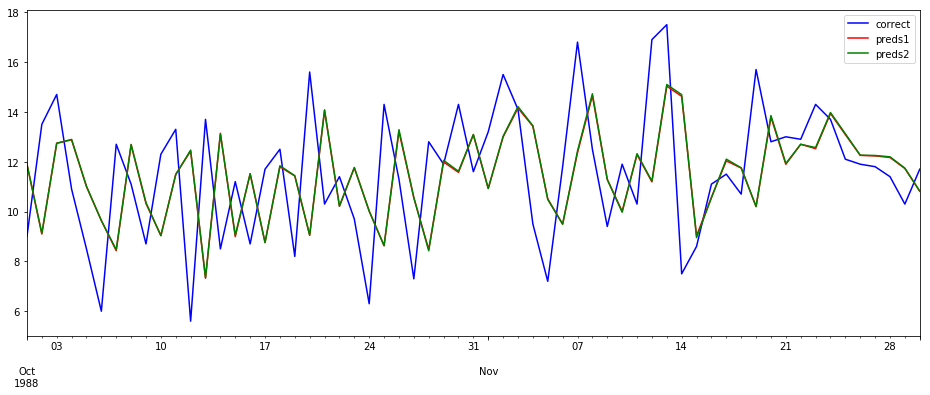

In [27]:
concat['1988-10':'1988-11'].plot(color=['b', 'r', 'g'])
plt.show()

Great, we show how to forecast for those dates, where we have known the correct temperature. But how to make real prediction for some future date for which we don't know the predicting value, i.e. how to make a weather forecast in our case?

Suppose, we want make predictions for the next week from the last known date `1990-01-31`. Instead of defined date we can set the number of time intervals

In [28]:
total_days = melbourne_temp.shape[0]
new_preds = model_fit.predict(start=1500, end=total_days+7)[-7:]  # 7 because of we are going to forecast for one week
new_preds

3651    13.023542
3652    13.042059
3653    13.142301
3654    12.861195
3655    12.663126
3656    12.586972
3657    12.532559
dtype: float64

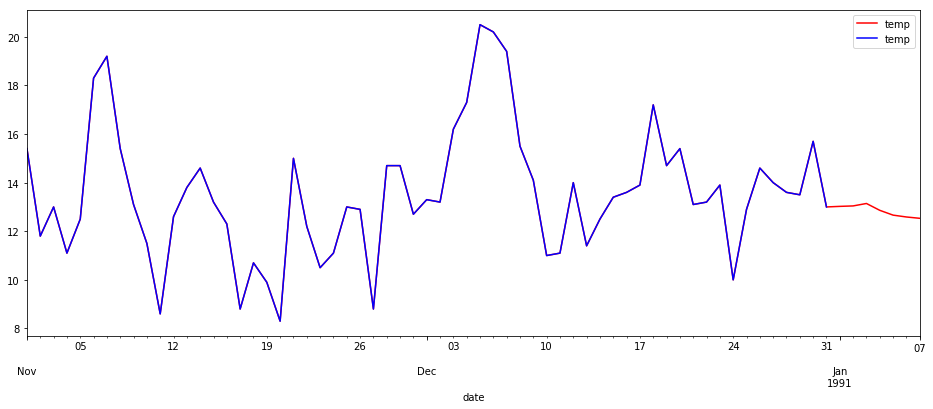

In [29]:
new_dates = pd.date_range(start='1991-01-01', periods=7, freq='D')
future = pd.DataFrame(data={'temp': new_preds.values}, index=new_dates)
new = melbourne_temp.append(future)

ax = new['1990-11':].plot(color='r')  # New values are drawn red
melbourne_temp['1990-11':].plot(ax=ax, color='b')
plt.show()

> ### Exercise:

> The file "climate_change.csv" contains climate data from May 1983 to December 2008. The available variables include:

> * `Year`: the observation year.
> * `Month`: the observation month.
> * `Temp`: the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.
> * `CO2`, `N2O`, `CH4`, `CFC.11`, `CFC.12`: atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division. CO2, N2O and CH4 are expressed in ppmv (parts per million by volume – i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere). CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume).
> * `Aerosols`: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun’s energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.
> * `TSI`: the total solar irradiance (TSI) in W/m2 (the rate at which the sun’s energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.
> * `MEI`: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division. You have to read this file. You will need such columns as year(the observation year), month(the observation month) and temp(the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.)

> You need to do the following: 

> 1. Read the described file with the help of pandas library. Concatenate `"Year"` and `"Month"` columns and convert it to datetime using `to_datetime`. Make this column as the index of the DataFrame and then drop columns `"Year"` and `"Month"`. Thus you will have convenient representation of time series. But opposite to the dataset considered in the lesson, the current dataset contains not only one time-dependent variable which should be converted to the numeric type.

> 2. Build a plot containing time series for each variable.

> 3. Investigate the dynamic of tempereature, does it increases from year to year or not? Display the year dynamic in the chart. Calculate the ratio between average temperature for XXI and XX centuries. 

> 4. Find months when the concentration of CO2 was the largest and when the concentration of all gases was the lowest. Display this months by some markers on the plotted time series. You may use matplotlib for such visualization (for example, look at [this example](http://matplotlib.org/examples/pylab_examples/scatter_star_poly.html)). Don't forget about possibility of resampling usage. 

> 5. Build ARIMA models to forecasting each variable for 2009 with month periodicity.

In [30]:
# type your code here